In [1]:
# bộ dữ liệu được lấy ở kaggle là dữ liệu mưa của Australia trong vong 10 năm đến 2010 ở một số khu vực
# ở Australia https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package

In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
import sklearn.metrics 

In [2]:
rain = pd.read_csv('D:/UITer/DataMaining/18521674_doan/rain.csv')

In [3]:
rain.head(20)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


In [4]:
# xem thông tin bảng kiểu dữ liệu 

In [5]:
rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [6]:
# Ta thấy được kiểu dữ liệu ở trong bảng có  kiểu là object và float 

In [7]:
rain.shape

(145460, 23)

In [8]:
## ở trong rain.csv có 145k dòng và 23 cột 

In [9]:
rain.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [10]:
(rain.isnull().sum()/len(rain))*100

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

In [11]:
# ta có thể thấy phần trăm dữ liệu thiếu trong data để tránh việc phân tích sai mình sẽ xóa đi một số cột có
# dữ liệu thiếu trên 30%

In [12]:
rain.drop(columns=['Evaporation','Sunshine','Cloud9am','Cloud3pm'], inplace=True)

In [13]:
rain.isnull().any()

Date             False
Location         False
MinTemp           True
MaxTemp           True
Rainfall          True
WindGustDir       True
WindGustSpeed     True
WindDir9am        True
WindDir3pm        True
WindSpeed9am      True
WindSpeed3pm      True
Humidity9am       True
Humidity3pm       True
Pressure9am       True
Pressure3pm       True
Temp9am           True
Temp3pm           True
RainToday         True
RainTomorrow      True
dtype: bool

In [14]:
# Diều này cho thấy chỉ có cột Data và Location là không có dữ liệu rỗng 

In [36]:
rain.info()
rain.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  int64  
 1   Location       145460 non-null  int32  
 2   MinTemp        145460 non-null  float64
 3   MaxTemp        145460 non-null  float64
 4   Rainfall       145460 non-null  float64
 5   WindGustDir    145460 non-null  int32  
 6   WindGustSpeed  145460 non-null  float64
 7   WindDir9am     145460 non-null  int32  
 8   WindDir3pm     145460 non-null  int32  
 9   WindSpeed9am   145460 non-null  float64
 10  WindSpeed3pm   145460 non-null  float64
 11  Humidity9am    145460 non-null  float64
 12  Humidity3pm    145460 non-null  float64
 13  Pressure9am    145460 non-null  float64
 14  Pressure3pm    145460 non-null  float64
 15  Temp9am        145460 non-null  float64
 16  Temp3pm        145460 non-null  float64
 17  RainToday      145460 non-nul

Date               int64
Location           int32
MinTemp          float64
MaxTemp          float64
Rainfall         float64
WindGustDir        int32
WindGustSpeed    float64
WindDir9am         int32
WindDir3pm         int32
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Temp9am          float64
Temp3pm          float64
RainToday          int32
RainTomorrow       int32
dtype: object

# Xữ lý những giá trị rỗng

In [16]:
# viết hàm xữ lý những giá trị rỗng 
def missing_value_number(rain):
    for col in rain.select_dtypes(['int','float']):
        rain[col] = rain[col].fillna(rain[col].mean())
    return rain

def missing_values_object(rain):
    for col in rain.select_dtypes(['object']):
        rain[col] = rain[col].fillna(method='ffill')
    return rain

def encoder(rain):
    le = LabelEncoder()
    for col in rain.select_dtypes('object'):
        rain[col] = le.fit_transform(rain[col])
    return rain

In [17]:
rain = missing_value_number(rain)
rain = missing_values_object(rain)

In [18]:
rain.isnull().any()

Date             False
Location         False
MinTemp          False
MaxTemp          False
Rainfall         False
WindGustDir      False
WindGustSpeed    False
WindDir9am       False
WindDir3pm       False
WindSpeed9am     False
WindSpeed3pm     False
Humidity9am      False
Humidity3pm      False
Pressure9am      False
Pressure3pm      False
Temp9am          False
Temp3pm          False
RainToday        False
RainTomorrow     False
dtype: bool

In [19]:
rain.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


# Trực Quan hóa dữ liệu


C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


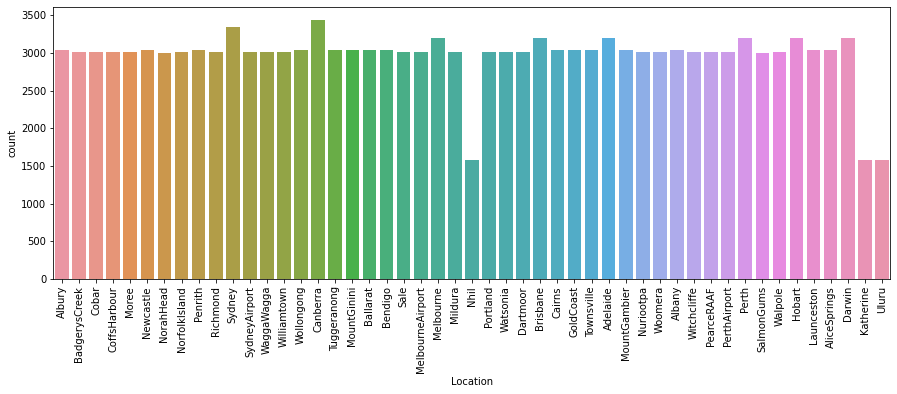

In [20]:
# phân tích lượng mưa ở các thành phố
plt.figure(figsize=(15, 5))
sns.countplot(rain['Location'])
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='WindGustDir', ylabel='count'>

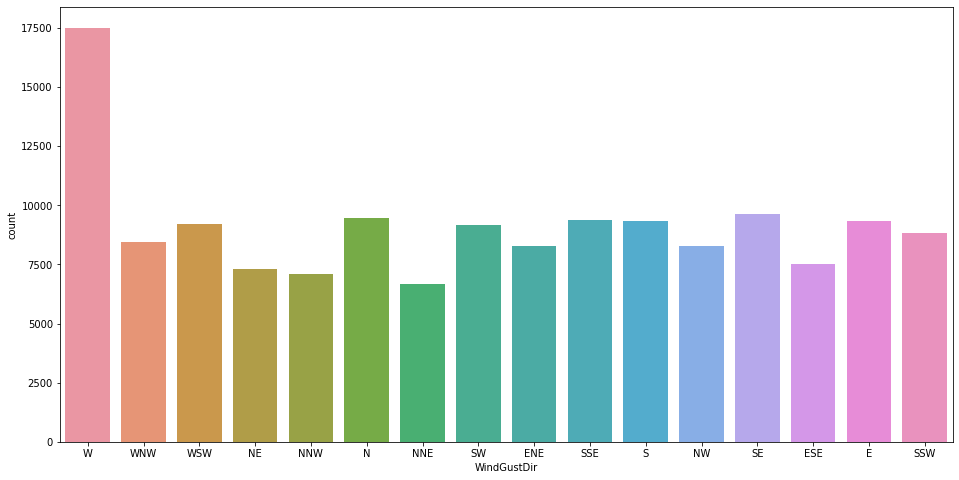

In [21]:
# Hướng gió trong 1 ngày 
plt.subplots(figsize=(16,8))
sns.countplot(data=rain, x='WindGustDir')


<AxesSubplot:xlabel='WindDir9am', ylabel='count'>

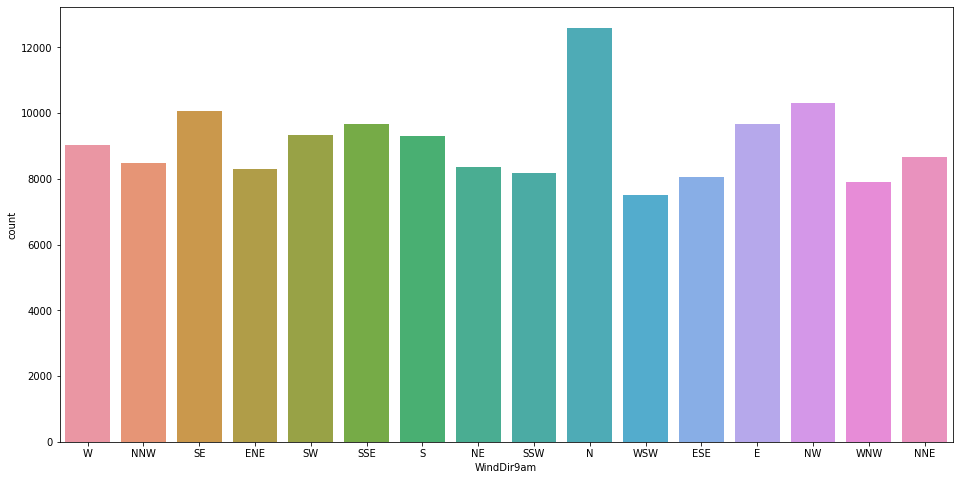

In [22]:
# hướng gió lúc 9 giờ sáng
plt.subplots(figsize=(16,8))
sns.countplot(data=rain, x='WindDir9am')

<AxesSubplot:xlabel='WindDir3pm', ylabel='count'>

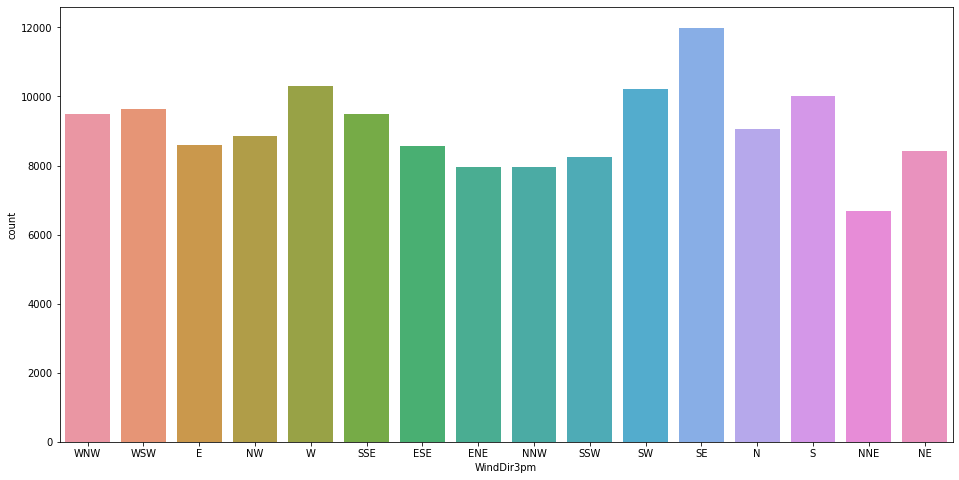

In [23]:
#Hướng gió lúc 3h chiều
plt.subplots(figsize=(16,8))
sns.countplot(data=rain, x='WindDir3pm')

<AxesSubplot:xlabel='RainToday', ylabel='count'>

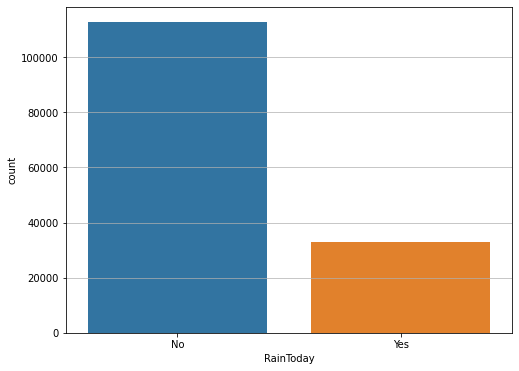

In [24]:
#thong kê mưa hôm nay
plt.subplots(figsize=(8,6))
plt.grid(linewidth = 0.7)
sns.countplot(data=rain, x='RainToday')

<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

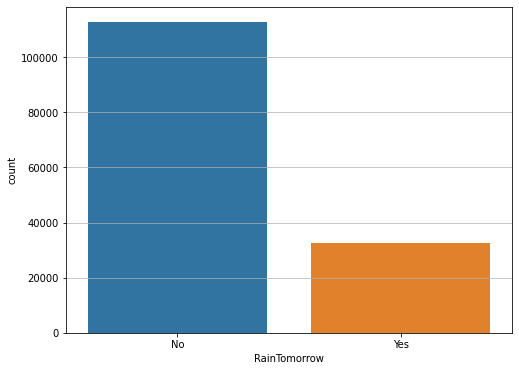

In [25]:
# dự đoán mưa của ngày mai 
plt.subplots(figsize=(8,6))
plt.grid(linewidth = 0.7)
sns.countplot(data=rain, x='RainTomorrow')

(array([     0.,  20000.,  40000.,  60000.,  80000., 100000., 120000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

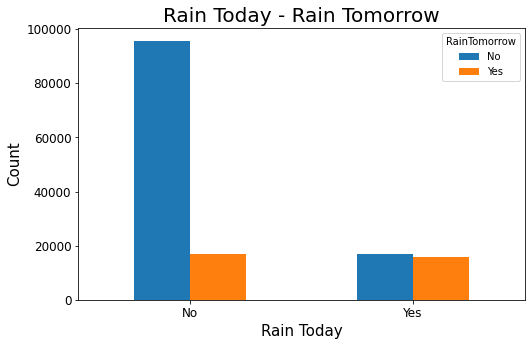

In [26]:
# phân tích mưa hôm nay và mưa ngày hôm sau
type_plt = pd.crosstab(rain['RainToday'], rain['RainTomorrow'])

plt.rcParams["figure.figsize"] = (8,5)

type_plt.plot(kind='bar',stacked=False)

plt.xlabel('Rain Today', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Rain Today - Rain Tomorrow', fontsize=20)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)

   Year  Month  Rainfall
0  2008     12       0.6
1  2008     12       0.0
2  2008     12       0.0
3  2008     12       0.0
4  2008     12       1.0


<Figure size 576x288 with 0 Axes>

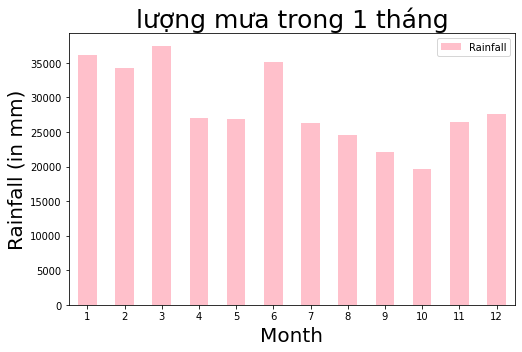

In [28]:
# thống kê lượng mưa theo tháng
rain['Date'] = pd.to_datetime(rain['Date'])
rainfall =[rain['Date'].dt.year, rain['Date'].dt.month, rain['Rainfall']]
headers = ['Year', 'Month', 'Rainfall']
rain_df = pd.concat(rainfall, axis=1, keys=headers)
print(rain_df.head())
plt.figure(figsize=(8,4))
a = rain_df.groupby('Month').agg({'Rainfall':'sum'})
a.plot(kind='bar', color='pink')
plt.title('lượng mưa trong 1 tháng', fontsize=25)
plt.xlabel('Month', fontsize=20)
plt.ylabel('Rainfall (in mm)', fontsize=20)
plt.xticks(rotation=0)
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, '2007'),
  Text(1, 0, '2008'),
  Text(2, 0, '2009'),
  Text(3, 0, '2010'),
  Text(4, 0, '2011'),
  Text(5, 0, '2012'),
  Text(6, 0, '2013'),
  Text(7, 0, '2014'),
  Text(8, 0, '2015'),
  Text(9, 0, '2016'),
  Text(10, 0, '2017')])

<Figure size 576x288 with 0 Axes>

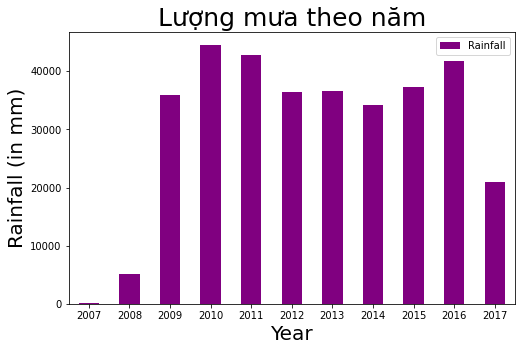

In [121]:
# lượng mưa theo năm 
plt.figure(figsize=(8,4))
a = rain_df.groupby('Year').agg({'Rainfall':'sum'})
a.plot(kind='bar', color='purple')
plt.title('Lượng mưa theo năm', fontsize=25)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Rainfall (in mm)', fontsize=20)
plt.xticks(rotation=0)

In [122]:
import scipy.stats as stats

C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Maximum Temperature')

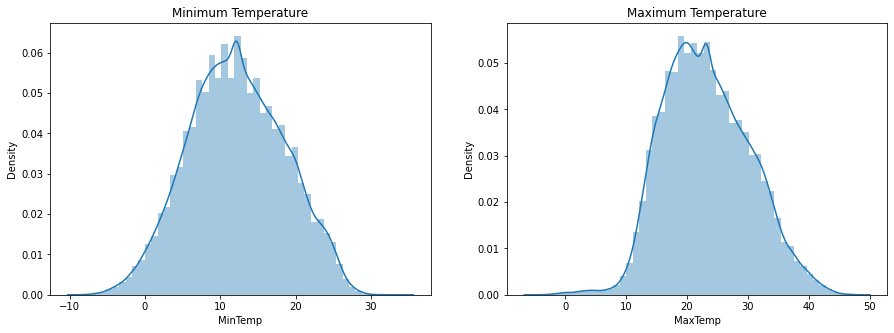

In [30]:
# thống kê nhiệt độ cao nhất và thấp nhất

fig, ax = plt.subplots(1, 2, figsize=(15,5))

# MinTemp
sns.distplot(rain['MinTemp'], ax=ax[0])
ax[0].set_title("Minimum Temperature")
# MaxTemp
sns.distplot(rain['MaxTemp'], ax=ax[1])
ax[1].set_title("Maximum Temperature")


In [31]:
#rain['Date'] = pd.to_datetime(rain['Date'])
#rain['Day'] = rain['Date'].dt.day
#rain['Month'] = rain['Date'].dt.month
#rain['Year'] = rain['Date'].dt.year
rain['Date'] = pd.to_datetime(rain['Date'],infer_datetime_format=True)
rain['Date'] = rain['Date'].apply(lambda x: x.toordinal())


In [32]:
rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  int64  
 1   Location       145460 non-null  object 
 2   MinTemp        145460 non-null  float64
 3   MaxTemp        145460 non-null  float64
 4   Rainfall       145460 non-null  float64
 5   WindGustDir    145460 non-null  object 
 6   WindGustSpeed  145460 non-null  float64
 7   WindDir9am     145460 non-null  object 
 8   WindDir3pm     145460 non-null  object 
 9   WindSpeed9am   145460 non-null  float64
 10  WindSpeed3pm   145460 non-null  float64
 11  Humidity9am    145460 non-null  float64
 12  Humidity3pm    145460 non-null  float64
 13  Pressure9am    145460 non-null  float64
 14  Pressure3pm    145460 non-null  float64
 15  Temp9am        145460 non-null  float64
 16  Temp3pm        145460 non-null  float64
 17  RainToday      145460 non-nul

<AxesSubplot:>

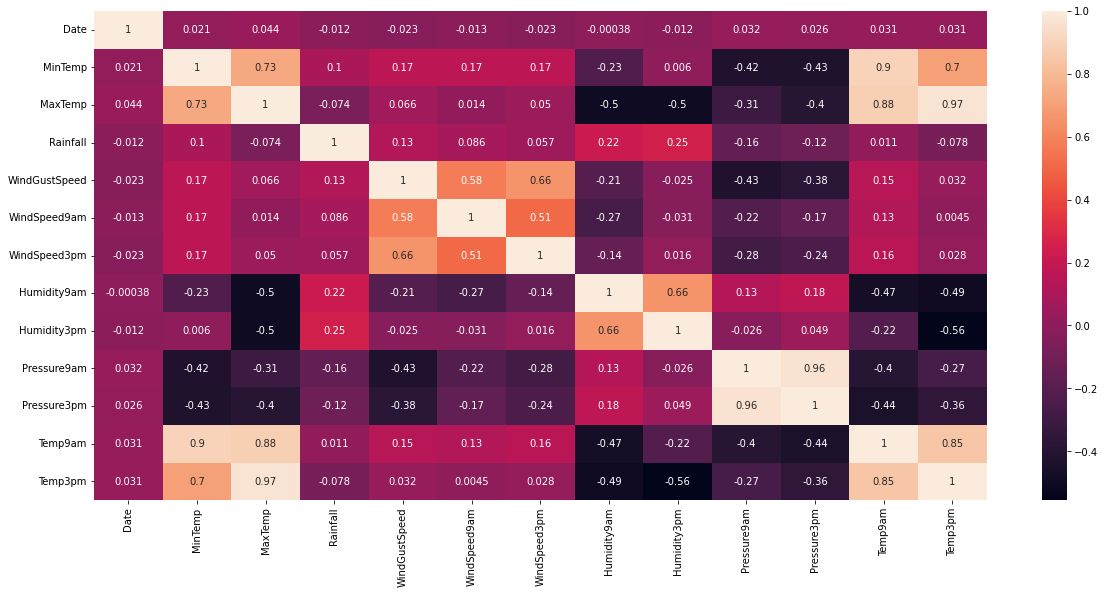

In [33]:
#headmap 
plt.figure(figsize=(20,9))
sns.heatmap(rain.corr(method='pearson'),annot=True)


In [34]:
from sklearn.preprocessing import LabelEncoder

In [37]:

encoder = LabelEncoder()
for col in rain.columns[[i==object for i in rain.dtypes]]:
    rain.loc[:,col] = encoder.fit_transform(rain[col])
rain.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,733377,2,13.4,22.9,0.6,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0
1,733378,2,7.4,25.1,0.0,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0
2,733379,2,12.9,25.7,0.0,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0
3,733380,2,9.2,28.0,0.0,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0
4,733381,2,17.5,32.3,1.0,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0


In [38]:
rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  int64  
 1   Location       145460 non-null  int32  
 2   MinTemp        145460 non-null  float64
 3   MaxTemp        145460 non-null  float64
 4   Rainfall       145460 non-null  float64
 5   WindGustDir    145460 non-null  int32  
 6   WindGustSpeed  145460 non-null  float64
 7   WindDir9am     145460 non-null  int32  
 8   WindDir3pm     145460 non-null  int32  
 9   WindSpeed9am   145460 non-null  float64
 10  WindSpeed3pm   145460 non-null  float64
 11  Humidity9am    145460 non-null  float64
 12  Humidity3pm    145460 non-null  float64
 13  Pressure9am    145460 non-null  float64
 14  Pressure3pm    145460 non-null  float64
 15  Temp9am        145460 non-null  float64
 16  Temp3pm        145460 non-null  float64
 17  RainToday      145460 non-nul

In [39]:
rain.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

#  Tách các cột dữ liệu thành hai phần, một phâng chứa những thuộc tính bình thường, một phần chứa reieeng thuộc tính quyết định

# Biến features: chứa những thuộc tính bình thường Biến labels : chứa thuộc tính quyết định (raintomorrow)

In [40]:
features=rain.drop('RainTomorrow',axis=1)
labels=rain['RainTomorrow']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(features.values, 
                                              labels.values,test_size=0.20, random_state=99)

# Thuật toán Decision Tree

# entropy

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
decision_tree = DecisionTreeClassifier(criterion="entropy", random_state=0)
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree1 = round(decision_tree.score(X_test, y_test) * 100, 2)
sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=Y_pred)
print("Accuracy", acc_decision_tree1)
print("Report",sk_report)
### Confusion Matrix 
pd.crosstab(y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Accuracy 78.56
Report               precision    recall  f1-score   support

           0   0.862003  0.861085  0.861544     22539
           1   0.523947  0.525866  0.524905      6553

    accuracy                       0.785577     29092
   macro avg   0.692975  0.693476  0.693224     29092
weighted avg   0.785856  0.785577  0.785716     29092



Predicted,0,1,All
Actual,,,
0,19408,3131,22539
1,3107,3446,6553
All,22515,6577,29092


<AxesSubplot:>

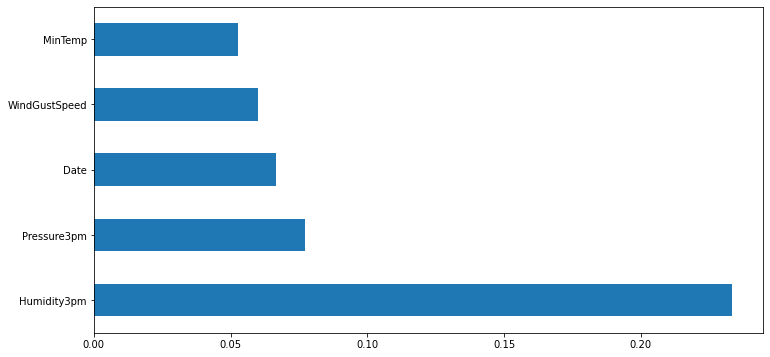

In [43]:
plt.figure(figsize=(12,6))
feat_importances = pd.Series(decision_tree.feature_importances_,index=features.columns)
feat_importances.nlargest(5).plot(kind='barh')

In [44]:
tree_cm= metrics.confusion_matrix(y_test, Y_pred)
tree_cm

NameError: name 'metrics' is not defined

In [45]:
#Đồ thị heatmap
plt.figure(figsize=(12,12))
sns.heatmap(tree_cm,annot=True,fmt=".3f",linewidths=.5,square=True,cmap='Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
title='Decision Tree Accuracy Score: {0}'.format(acc_decision_tree1)
plt.title(title,size=15)

NameError: name 'tree_cm' is not defined

<Figure size 864x864 with 0 Axes>

# gini

In [46]:
decision_tree = DecisionTreeClassifier(criterion="gini", random_state=0)
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree1 = round(decision_tree.score(X_test, y_test) * 100, 2)
sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=Y_pred)
print("Accuracy", acc_decision_tree1)
print("Report",sk_report)
### Confusion Matrix 
pd.crosstab(y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Accuracy 78.21
Report               precision    recall  f1-score   support

           0   0.861904  0.855939  0.858911     22539
           1   0.516023  0.528308  0.522093      6553

    accuracy                       0.782139     29092
   macro avg   0.688964  0.692123  0.690502     29092
weighted avg   0.783994  0.782139  0.783042     29092



Predicted,0,1,All
Actual,,,
0,19292,3247,22539
1,3091,3462,6553
All,22383,6709,29092


<AxesSubplot:>

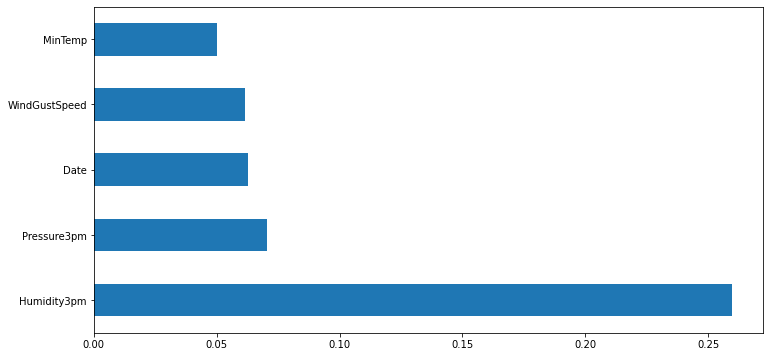

In [47]:
plt.figure(figsize=(12,6))
feat_importances = pd.Series(decision_tree.feature_importances_,index=features.columns)
feat_importances.nlargest(5).plot(kind='barh')

# Thuật toán Logistic Regression

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr = LogisticRegression()
# Fit the model on the trainng data.
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=y_pred)
print("Accuracy", round(accuracy_score(y_pred, y_test)*100,2))
print(sk_report)
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Accuracy 77.47
              precision    recall  f1-score   support

           0   0.774749  1.000000  0.873080     22539
           1   0.000000  0.000000  0.000000      6553

    accuracy                       0.774749     29092
   macro avg   0.387375  0.500000  0.436540     29092
weighted avg   0.600236  0.774749  0.676418     29092



C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

Predicted,0,All
Actual,,
0,22539,22539
1,6553,6553
All,29092,29092


# Thuật toán Naive Bayes

In [59]:
from sklearn.naive_bayes import GaussianNB
# import them thu vien sklearn metric
import sklearn.metrics as metrics

In [60]:
gnb= GaussianNB()
bayes_pred=gnb.fit(X_train,y_train).predict(X_test)
bayes_score=metrics.accuracy_score(y_test,bayes_pred)
print("Accuracy:",bayes_score)
print("Report:",metrics.classification_report(y_test,bayes_pred))
pd.crosstab(y_test, bayes_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Accuracy: 0.8072666025024061
Report:               precision    recall  f1-score   support

           0       0.86      0.89      0.88     22539
           1       0.58      0.52      0.55      6553

    accuracy                           0.81     29092
   macro avg       0.72      0.70      0.71     29092
weighted avg       0.80      0.81      0.80     29092



Predicted,0,1,All
Actual,,,
0,20107,2432,22539
1,3175,3378,6553
All,23282,5810,29092


In [61]:
bayes_cm=metrics.confusion_matrix(y_test,bayes_pred)
bayes_cm

array([[20107,  2432],
       [ 3175,  3378]], dtype=int64)

Text(0.5, 1.0, 'Decision Tree Accuracy Score: 0.8072666025024061')

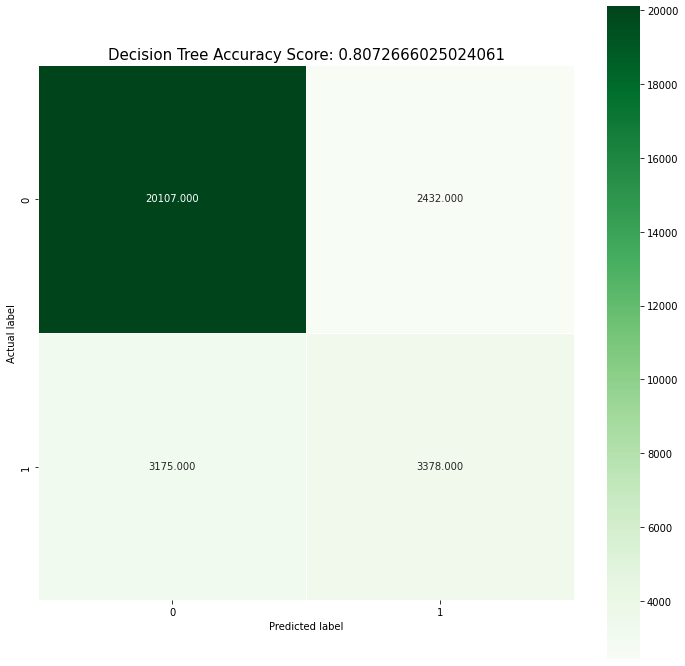

In [62]:
plt.figure(figsize=(12,12))
sns.heatmap(bayes_cm,annot=True,fmt=".3f",linewidths=.5,square=True,cmap='Greens');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
title='Decision Tree Accuracy Score: {0}'.format(bayes_score)
plt.title(title,size=15)

# Thuật toán Random Forest

In [55]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=20)
random_forest.fit(X_train,y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_test, y_test)
acc_random_forest1 = round(random_forest.score(X_test, y_test) * 100, 2)

sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=Y_pred)
print("Accuracy" , acc_random_forest1)
print(sk_report)
pd.crosstab(y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Accuracy 84.76
              precision    recall  f1-score   support

           0   0.863890  0.953503  0.906487     22539
           1   0.751364  0.483290  0.588224      6553

    accuracy                       0.847587     29092
   macro avg   0.807627  0.718396  0.747356     29092
weighted avg   0.838544  0.847587  0.834798     29092



Predicted,0,1,All
Actual,,,
0,21491,1048,22539
1,3386,3167,6553
All,24877,4215,29092


<AxesSubplot:>

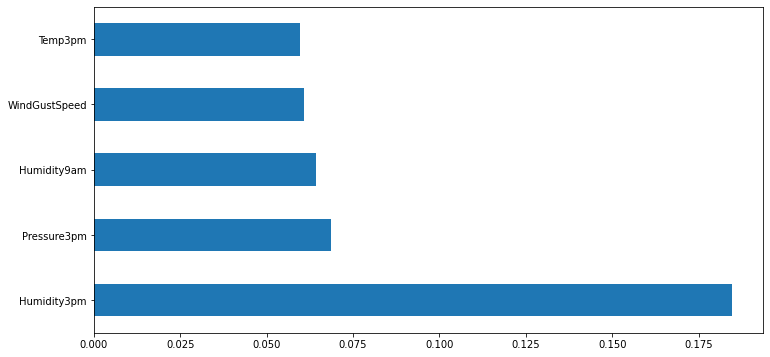

In [56]:
plt.figure(figsize=(12,6))
feat_importances = pd.Series(random_forest.feature_importances_,index=features.columns)
feat_importances.nlargest(5).plot(kind='barh')

## Decision tree

## [link github](https://google.com)

In [57]:
print(decision_tree.predict([[733378,2,7.4,25.1,0,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0]]))

[0]


>### 0 = No ( không có Mưa ngày hôm sau ) ; 1 = yes (ngày hôm sau có mưa) 

In [65]:
print(lr.predict([[733378,2,7.4,25.1,0,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0]]))

[0]
